In [111]:
%matplotlib notebook
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from tqdm import tqdm
import random as rnd
import math as math
import scipy as sci

Teniendo en cuenta la ecuación de Burguers en 2D, se tiene que su discretización está dada por:

$$u_{i,j}^{l+1} = \Delta t \left(- u^{l}_{i,j}\frac{u^{l}_{i+1,j}-u^{l}_{i-1,j}}{2\Delta x}+\nu \frac{u^l_{i+1,j}-2u^l_{i,j}+u^{l}_{i-1,j}}{\Delta x^2} - u^{l}_{i,j}\frac{u^{l}_{i,j+1}-u^{l}_{i,j-1}}{2\Delta y}+\nu \frac{u^l_{i,j+1}-2u^l_{i,j}+u^{l}_{i,j-1}}{\Delta x^2}\right) + u_{i,j}^{l}$$

In [112]:
#Condiciones del sistema
Nt = 500
Nx,Ny = 60,60
x = np.linspace(-5,5,Nx)
y = np.linspace(-5,5,Ny)
t = np.linspace(0,10,Nt)
dx = x[1] - x[0]
dy = y[1] - y[0]
dt = t[1] - t[0]
nu = 0.3

In [113]:
def h1(x,y):
    return 0
def h2(x,y):
    return 0
def h3(x,y):
    return 0
def h4(x,y):
    return 0

In [114]:
def Init_matrix(x,y):
    T = np.zeros((Nt,Nx,Ny))
    T[0,:,0] = h1(x,y) 
    T[0,:,-1] = h2(x,y) 
    T[0,0,:] = h3(x,y) 
    T[0,-1,0] = h4(x,y)
    for i in range(1,Nx-1):
        for j in range(1,Ny-1):
            T[0,i,j] = 5*np.exp(-( x[i]**2+ y[j]**2))
    
    return T

In [115]:
u = Init_matrix(x,y)

In [116]:
def GetSolution(T,x,y):
    for l in tqdm(range(1,Nt)):
        for i in range(2,Nx-2):
            for j in range(2,Ny-2):
                T[l,i,j] = dt*(-T[l-1,i,j]*(T[l-1,i+1,j]-T[l-1,i-1,j])/(2*dx) + nu*(T[l-1,i+1,j] -2*T[l-1,i,j] +T[l-1,i-1,j])/(dx**2) -T[l-1,i,j]*(T[l-1,i,j+1]-T[l-1,i,j-1])/(2*dy) + nu*(T[l-1,i,j+1] -2*T[l-1,i,j] +T[l-1,i,j-1])/(dx**2)) + T[l-1,i,j]

In [117]:
GetSolution(u,x,y)

100%|████████████████████████████████████████████████████████████████████████████████| 499/499 [00:29<00:00, 16.88it/s]


<IPython.core.display.Javascript object>


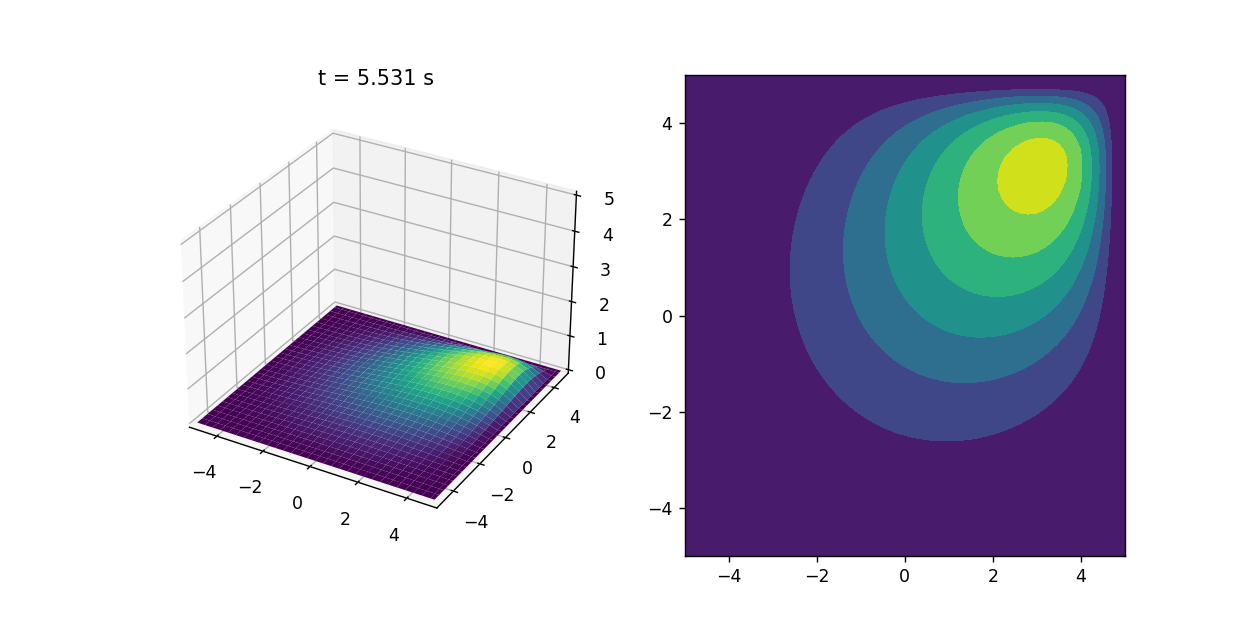

In [122]:
X,Y = np.meshgrid(x,y)
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(121,projection="3d")
ax2 = fig.add_subplot(122)

ax1.set_xlabel("x")
ax1.set_ylabel("y")

def init():
    
    ax1.set_xlim(-5,5)
    ax1.set_ylim(-5,5)
    ax1.set_zlim(0,5)
    
    ax2.set_xlim(-5,5)
    ax2.set_ylim(-5,5)
    

def Update(i):

    ax1.clear()
    ax2.clear()
    init()
    
    ax1.plot_surface(X,Y,u[3*i,:,:],cmap='viridis')
    ax1.set_title("t = %s s"%(round(t[3*i],3)))
    
    ax2.contourf(X,Y,u[3*i,:,:],cmap="viridis")
    
Animation = anim.FuncAnimation(fig,Update,frames=len(t[::3]),init_func=init, repeat = False)
